# Multi-Armed Bandit Problem

In [203]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from statistics import mean

# Importing the dataset
dataset = pd.read_csv('Ads_Optimisation.csv')
Niter = 100

In [204]:
# Implementing Random Selection
import random
N = 10000
d = 10
ads_selected = []
total_rewards_random = []

for iteration in range(0, Niter):
    total_reward = 0
    
    for n in range(0, N):
        ad = random.randrange(d)
        ads_selected.append(ad)
        # reward = random.gauss(mu=mab_reward_mu[ad], sigma=1.0)
        reward = dataset.values[n, ad]
        total_reward += reward
        
    total_rewards_random.append(total_reward)

In [205]:
def find_max_index(List):
    max_item = 0
    max_index = 0
    
    for i in range(0, len(List)):
        if List[i] > max_item:
            max_item = List[i]
            max_index = i
            
    return max_index

In [219]:
# Implementing Greedy Selection
import random
N = 10000
d = 10
Nrandom = 50
total_rewards_greedy = []

for iteration in range(0, Niter):
    ads_selected = []
    ads_rewards = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
    total_reward = 0
    for n in range(0, Nrandom):
        ad = random.randrange(d)
        ads_selected.append(ad)
        reward = dataset.values[n, ad]
        ads_rewards[ad] += reward
        total_reward += reward

    for n in range(Nrandom, N):
        top_ad = find_max_index(ads_rewards) # ad from 0 - 9
        # print("The ad brings highest reward is: ", top_ad + 1)
        ad = top_ad
        ads_selected.append(ad)
        reward = dataset.values[n, ad]
        ads_rewards[ad] += reward
        total_reward += reward
    
    total_rewards_greedy.append(total_reward)
    
avg_total_reward_greedy = mean(total_rewards_greedy)  
print("average total reward: ", avg_total_reward_greedy)

average total reward:  1991


In [220]:
# Implementing epison-Greedy Selection
import random
N = 10000
d = 10
Nrandom = 50
epison = 0.1
total_rewards_ep_greedy = []

for iteration in range(0, Niter):
    ads_selected = []
    ads_rewards = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
    total_reward = 0
    for n in range(0, Nrandom):
        ad = random.randrange(d)
        ads_selected.append(ad)
        reward = dataset.values[n, ad]
        ads_rewards[ad] += reward
        total_reward += reward

    for n in range(Nrandom, N):
        top_ad = find_max_index(ads_rewards) # ad from 0 - 9
        # print("The ad brings highest reward is: ", top_ad + 1)
        
        random_prob = random.uniform(0, 1)
        if random_prob < epison:
            ad = random.randrange(d)
        else:
            ad = top_ad
        ads_selected.append(ad)
        reward = dataset.values[n, ad]
        ads_rewards[ad] += reward
        total_reward += reward
    
    total_rewards_ep_greedy.append(total_reward)

In [208]:
# Implementing UCB Selection
import math
N = 10000
d = 10
ads_selected = []
numbers_of_selections = [0] * d
sums_of_reward = [0] * d
total_reward = 0
total_rewards_ucb = []

for iteration in range(0, Niter):
    total_reward = 0
    for n in range(0, N):
        ad = 0
        max_upper_bound = 0
        for i in range(0, d):
            if (numbers_of_selections[i] > 0):
                average_reward = sums_of_reward[i] / numbers_of_selections[i]
                delta_i = math.sqrt(2 * math.log(n+1) / numbers_of_selections[i])
                upper_bound = average_reward + delta_i
            else:
                upper_bound = 1e400
            if upper_bound > max_upper_bound:
                max_upper_bound = upper_bound
                ad = i
        ads_selected.append(ad)
        numbers_of_selections[ad] += 1
        reward = dataset.values[n, ad]
        sums_of_reward[ad] += reward
        total_reward += reward
        
    total_rewards_ucb.append(total_reward)
    
avg_total_reward_ucb = mean(total_rewards_ucb)  
print("average total reward: ", avg_total_reward_ucb)

average total reward:  2683


In [223]:
print("Average total reward: ")
avg_total_reward_random = mean(total_rewards_random)  
print("Random: ", avg_total_reward_random)

avg_total_reward_greedy = mean(total_rewards_greedy)  
print("Greedy: ", avg_total_reward_greedy)
      
avg_total_reward_ep_greedy = mean(total_rewards_ep_greedy)  
print("Epsilon Greedy: ", avg_total_reward_ep_greedy)
      
avg_total_reward_ucb = mean(total_rewards_ucb)  
print("UCB: ", avg_total_reward_ucb)

Average total reward: 
Random:  1236
Greedy:  1991
Epsilon Greedy:  2025
UCB:  2683


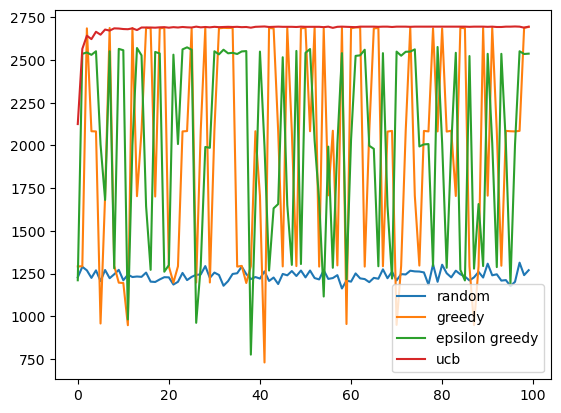

In [224]:
import matplotlib.pyplot as plt
plt.plot(total_rewards_random, label = "random")
plt.plot(total_rewards_greedy, label = "greedy")
plt.plot(total_rewards_ep_greedy, label = "epsilon greedy")
plt.plot(total_rewards_ucb, label = "ucb")
plt.legend()
plt.show()

In [123]:
# Sensitive analysis on epison-Greedy Selection
import random
N = 10000
d = 10
Nrandom_1 = 10
Nrandom_2 = 20
Nrandom_3 = 30
epison_1 = 0.1
epison_2 = 0.2
epison_3 = 0.3
ads_selected = []
ads_rewards = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
total_rewards_ep_greedy = []

for iteration in range(0, Niter):
    total_reward = 0
    for n in range(0, Nrandom):
        ad = random.randrange(d)
        ads_selected.append(ad)
        # reward = random.gauss(mu=mab_reward_mu[ad], sigma=1.0)
        reward = dataset.values[n, ad]
        ads_rewards[ad] += reward
        total_reward += reward

    for n in range(Nrandom, N):
        top_ad = find_max_index(ads_rewards) # ad from 0 - 9
        # print(ads_rewards)
        # print("The ad brings highest reward is: ", top_ad + 1)
        
        random_prob = random.random()
        if random_prob < epison:
            ad = random.randrange(d)
        else:
            ad = top_ad
        ads_selected.append(ad)
        # reward = random.gauss(mu=mab_reward_mu[ad], sigma=1.0)
        reward = dataset.values[n, ad]
        ads_rewards[ad] += reward
        total_reward += reward
    
    total_rewards_ep_greedy.append(total_reward)
    
avg_total_reward_ep_greedy = mean(total_rewards_ep_greedy)  
print("average total reward: ", avg_total_reward_ep_greedy)

average total reward for epison greedy:  1986
average total reward for greedy:  2071
